# Project 4: Coronavirus Goes Randomly Viral

###### Group Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

#### Excersice 1: Random walk $\ SI$-model

##### Task 1

In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [25]:
class RandomWalkSIModel:
    def __init__(self, nx=50, ny=50, N=688, q=0.9, initial_infected=1, p_recover=0):
        self.nx = nx
        self.ny = ny 
        self.N = N 
        self.q = q 
        self.initial_infected = initial_infected
        self.p_recover = p_recover
        
        self.positions = np.random.randint(0, nx, size=(N, 2))
        self.states = np.zeros(N, dtype=int)

        infected_indices = np.random.choice(np.arange(self.N), size=self.initial_infected, replace=False)
        self.states[infected_indices] = 1
        
        self.history_S = []
        self.history_I = []
        self.history_R = []
        self.beta_estimates = []

    def move_walkers(self):
        """Move each walker randomly to one of the four neighboring nodes."""
        directions = np.random.choice(['N', 'S', 'E', 'W'], size=self.N)
        for i, direction in enumerate(directions):
            if direction == 'N':
                self.positions[i][1] += 1
            elif direction == 'S':
                self.positions[i][1] -= 1
            elif direction == 'E':
                self.positions[i][0] += 1
            elif direction == 'W':
                self.positions[i][0] -= 1

            self.positions[i][0] = np.clip(self.positions[i][0], 0, self.nx - 1)
            self.positions[i][1] = np.clip(self.positions[i][1], 0, self.ny - 1)

    def update_infections(self):
        """Update the infection state based on walker interactions."""
        position_map = defaultdict(list)
        for idx, pos in enumerate(self.positions):
            pos_tuple = tuple(pos)
            position_map[pos_tuple].append(idx)
        for walkers in position_map.values():
            if len(walkers) > 1:
                infected_present = np.any(self.states[walkers] == 1)
                if infected_present:
                    for idx in walkers:
                        if self.states[idx] == 0:
                            if np.random.random() < self.q:
                                self.states[idx] = 1

    def recover_individuals(self):
        """Recover infected individuals with probability p_recover."""
        for i in range(self.N):
            if self.states[i] == 1 and np.random.random() < self.p_recover:
                self.states[i] = 2

    def estimate_beta(self, step):
        """Estimate beta for the current step based on the change in S."""
        if step > 0:
            S_t = self.history_S[step]
            S_t_prev = self.history_S[step - 1]
            I_t = self.history_I[step]
            if S_t > 0 and I_t > 0:
                beta_t = - (S_t - S_t_prev) / (S_t * I_t) * self.N
                self.beta_estimates.append(beta_t)

    def run_simulation(self, steps=300):
        """Run the simulation for a given number of time steps."""
        for step in range(steps):
            self.move_walkers()
            self.update_infections()
            self.recover_individuals()

            self.history_S.append(np.sum(self.states == 0))
            self.history_I.append(np.sum(self.states == 1))
            self.history_R.append(np.sum(self.states == 2))

            self.estimate_beta(step)

        beta_avg = np.mean(self.beta_estimates) if self.beta_estimates else 0
        return beta_avg
    
def si_model_solution(beta, S0, I0, N, t):
    """Analytical solution for the SI model."""
    return N / (1 + (S0 / I0) * np.exp(-beta * t))
            
def multiple_runs_simulation(num_runs=100, steps=300, initial_infected=10, p_recover=0):
    history_S = np.zeros((num_runs, steps))
    history_I = np.zeros((num_runs, steps))
    history_R = np.zeros((num_runs, steps))
    beta_values = []

    for i in range(num_runs):
        model = RandomWalkSIModel(initial_infected=initial_infected, p_recover=p_recover)
        beta_avg = model.run_simulation(steps=steps)
        history_S[i] = model.history_S
        history_I[i] = model.history_I
        history_R[i] = model.history_R

        beta_values.append(beta_avg)

    mean_S = np.mean(history_S, axis=0)
    std_S = np.std(history_S, axis=0)
    mean_I = np.mean(history_I, axis=0)
    std_I = np.std(history_I, axis=0)
    mean_R = np.mean(history_R, axis=0)  
    std_R = np.std(history_R, axis=0)

    mean_beta = np.mean(beta_values)
    print(f"Estimated β: {mean_beta}")

    time = np.arange(steps)
    plt.figure(figsize=(10, 6))
    
    plt.plot(time, mean_S, label='Susceptible (mean)', color='blue')
    plt.fill_between(time, mean_S - std_S, mean_S + std_S, color='blue', alpha=0.3)
    
    plt.plot(time, mean_I, label='Infected (mean)', color='red')
    plt.fill_between(time, mean_I - std_I, mean_I + std_I, color='red', alpha=0.3)

    plt.plot(time, mean_R, label='Recovered (mean)', color='yellow')  
    plt.fill_between(time, mean_R - std_R, mean_R + std_R, color='yellow', alpha=0.3)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Population')
    plt.title('Population Dynamics with Uncertainty')
    plt.legend()
    plt.grid()
    plt.show()

    return mean_beta

##### Task 2

Estimated β: 0.04292749703692924


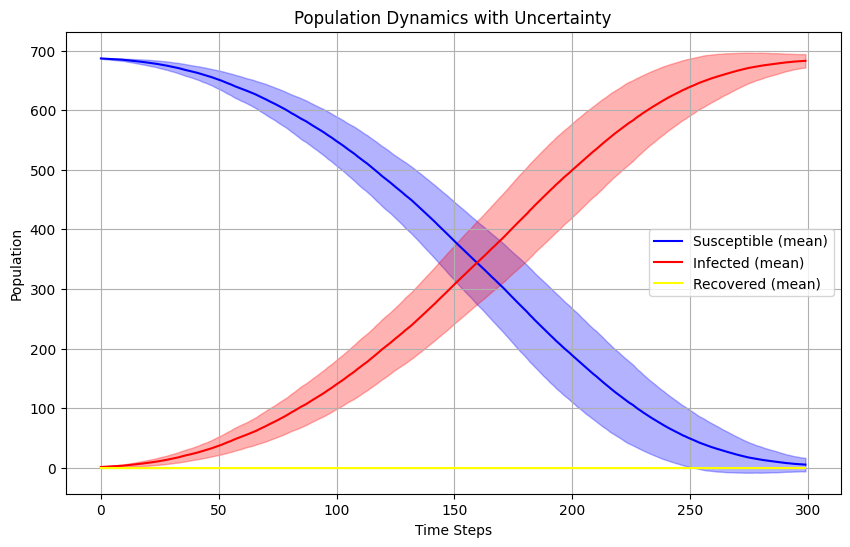

np.float64(0.04292749703692924)

In [26]:
multiple_runs_simulation(num_runs=100, steps=300, initial_infected=1, p_recover=0)

##### Task 3

Estimated β: 0.070598948850778


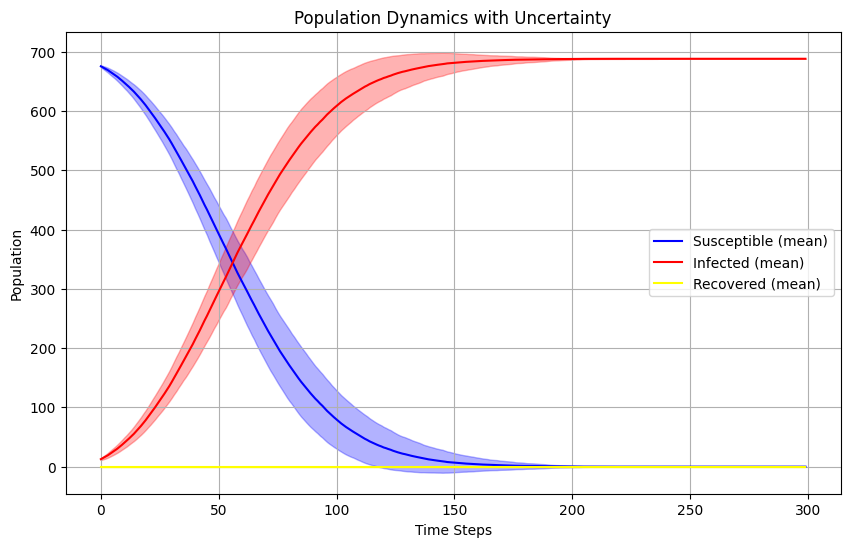

np.float64(0.070598948850778)

In [27]:
multiple_runs_simulation(num_runs=100, steps=300, initial_infected=10, p_recover=0)

#### Excersice 2: Compare random walk and ODE-based models

Estimated β: 0.07562702722768913


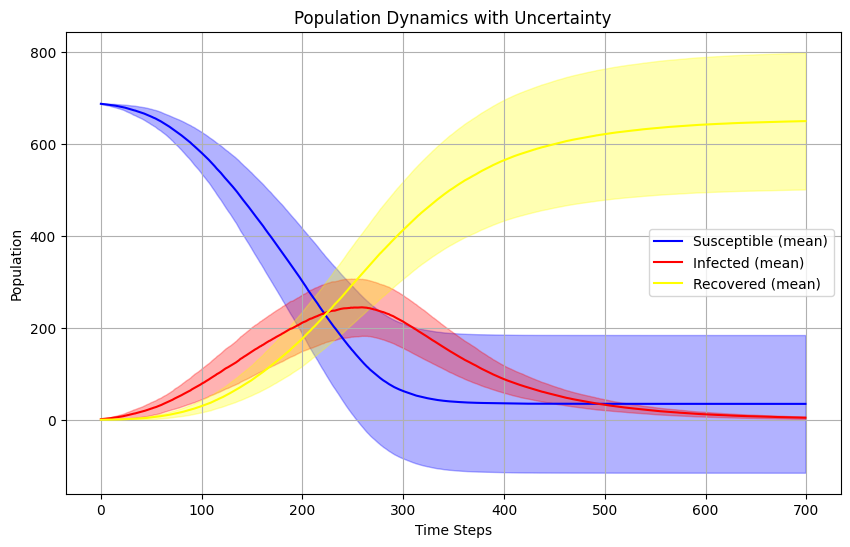

np.float64(0.07562702722768913)

In [29]:
multiple_runs_simulation(num_runs=100, steps=700, initial_infected=1, p_recover=0.01)